# Sentiment Classification using TweetEval Dataset
This notebook performs sentiment classification using the [TweetEval](https://huggingface.co/datasets/tweet_eval) dataset. We use traditional TF-IDF vectorization and logistic regression as a baseline.

**Labels:**
- 0: Negative  
- 1: Neutral  
- 2: Positive (We drop this for binary classification)

Goal: Build a baseline sentiment classifier for customer intelligence.

In [9]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "sentiment")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
import pandas as pd

df = dataset["train"].to_pandas()
df = df[df["label"] != 1]  # Remove neutral class
df["label"] = df["label"].map({0: "negative", 2: "positive"})
df = df.dropna()

df["text"] = df["text"].str.lower().str.strip()
df.sample(5)

,text,label
25673,i favorited a @user video pope explains the si...,positive
35315,the series finale date of gossip girl will be ...,positive
42172,@user @user wed nite salutes industry employee...,positive
34133,don't forget to collect the bills and win free...,positive
23568,awww hell. it was a black cop that shot the wh...,negative


In [11]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [14]:

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.56      0.66      1419
    positive       0.84      0.94      0.89      3570

    accuracy                           0.83      4989
   macro avg       0.82      0.75      0.77      4989
weighted avg       0.83      0.83      0.82      4989



In [15]:
import joblib
import os

os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

joblib.dump((X_train_vec, y_train), "data/train.pkl")
joblib.dump((X_test_vec, y_test), "data/test.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")
joblib.dump(model, "models/model.pkl")

['models/model.pkl']

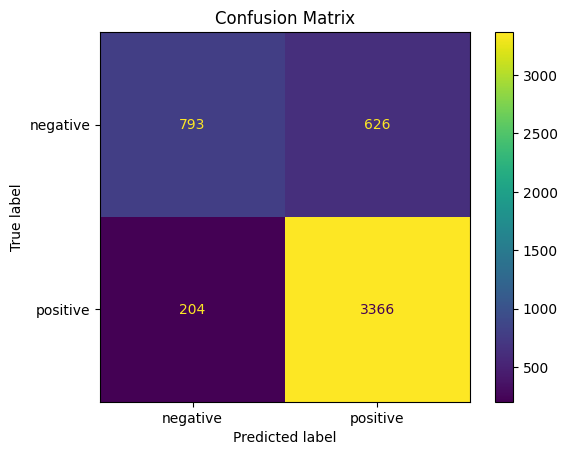

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)
plt.title("Confusion Matrix")
plt.show()